In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(r"C:\Users\ankam\Downloads\Train_psolI3n - Copy.csv")
df_test = pd.read_csv(r"C:\Users\ankam\Downloads\Test_09JmpYa.csv")

In [3]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28653 entries, 0 to 28652
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   28653 non-null  object 
 1   Email_Type                 28653 non-null  int64  
 2   Subject_Hotness_Score      28653 non-null  float64
 3   Email_Source_Type          28653 non-null  int64  
 4   Customer_Location          23857 non-null  object 
 5   Email_Campaign_Type        28653 non-null  int64  
 6   Total_Past_Communications  25783 non-null  float64
 7   Time_Email_sent_Category   28653 non-null  int64  
 8   Word_Count                 28653 non-null  int64  
 9   Total_Links                27711 non-null  float64
 10  Total_Images               27946 non-null  float64
 11  Email_Status               28653 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.6+ MB
None


In [7]:
df_train.isnull().sum()

Email_ID                        0
Email_Type                      0
Subject_Hotness_Score           0
Email_Source_Type               0
Customer_Location            4796
Email_Campaign_Type             0
Total_Past_Communications    2870
Time_Email_sent_Category        0
Word_Count                      0
Total_Links                   942
Total_Images                  707
Email_Status                    0
dtype: int64

In [9]:
df_train['Customer_Location'].nunique()

7

In [11]:
df_train.loc[:, 'Customer_Location'] = df_train['Customer_Location'].fillna(df_train['Customer_Location'].mode()[0])
df_train.loc[:, 'Total_Past_Communications'] = df_train['Total_Past_Communications'].fillna(df_train['Total_Past_Communications'].median())
df_train.loc[:, 'Total_Links'] = df_train['Total_Links'].fillna(df_train['Total_Links'].median())
df_train.loc[:, 'Total_Images'] = df_train['Total_Images'].fillna(0)

In [13]:
df_train.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [15]:
df_train.dtypes

Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
dtype: object

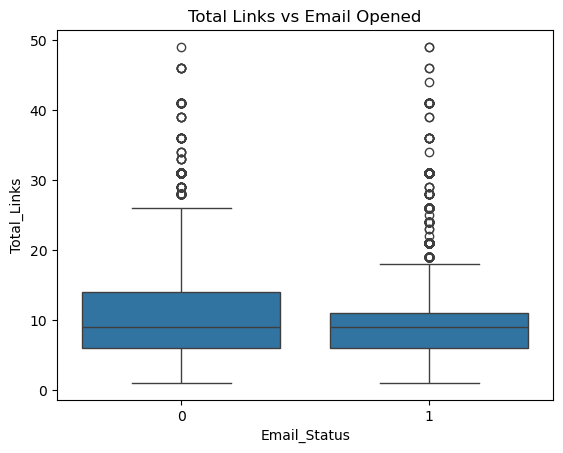

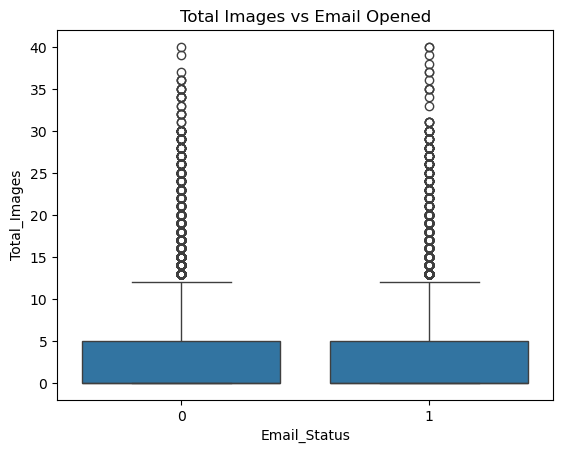

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Email_Status", y="Total_Links", data=df_train)
plt.title("Total Links vs Email Opened")
plt.show()

sns.boxplot(x="Email_Status", y="Total_Images", data=df_train)
plt.title("Total Images vs Email Opened")
plt.show()

In [17]:
df_train["Total_Links"] = df_train["Total_Links"].clip(upper=50)
df_train["Total_Images"] = df_train["Total_Images"].clip(upper=40)

In [21]:
from sklearn.preprocessing import StandardScaler

# Define categorical and numerical columns
categorical_cols = [
    'Email_Type', 
    'Email_Source_Type', 
    'Customer_Location', 
    'Email_Campaign_Type', 
    'Time_Email_sent_Category'
]
numerical_cols = [
    'Total_Past_Communications', 
    'Word_Count', 
    'Total_Links', 
    'Total_Images', 
    'Subject_Hotness_Score'
]

df_processed = pd.get_dummies(df_train, columns=categorical_cols, drop_first=False)

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

In [23]:
print(df_processed.columns)

Index(['Email_ID', 'Subject_Hotness_Score', 'Total_Past_Communications',
       'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status',
       'Email_Type_1', 'Email_Type_2', 'Email_Source_Type_1',
       'Email_Source_Type_2', 'Customer_Location_A', 'Customer_Location_B',
       'Customer_Location_C', 'Customer_Location_D', 'Customer_Location_E',
       'Customer_Location_F', 'Customer_Location_G', 'Email_Campaign_Type_1',
       'Email_Campaign_Type_2', 'Email_Campaign_Type_3',
       'Time_Email_sent_Category_1', 'Time_Email_sent_Category_2',
       'Time_Email_sent_Category_3'],
      dtype='object')


In [25]:
df_processed = df_processed.drop(['Email_ID'], axis=1)

In [27]:
df_processed

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,...,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1.271872,0.132075,-0.811819,-0.353300,-0.620024,0,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,1.171198,-1.267925,-0.582445,-0.837636,-0.620024,0,False,True,True,False,...,False,False,False,True,False,True,False,False,True,False
2,-0.842286,0.365409,1.059012,-0.837636,-0.620024,1,False,True,True,False,...,False,False,False,False,False,False,True,False,True,False
3,2.077266,-0.490147,-0.202545,0.938262,-0.620024,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
4,-0.942960,-1.034591,1.005253,-0.999081,-0.620024,0,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28648,0.365804,-0.490147,-0.263472,0.131036,-0.248713,1,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
28649,-0.842286,-2.434592,0.621768,-0.191855,-0.620024,1,False,True,True,False,...,True,False,False,False,True,False,False,False,True,False
28650,-0.842286,0.754298,1.331394,-0.191855,2.164807,0,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
28651,0.265130,-0.101258,-0.363823,0.615372,-0.063058,1,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [29]:
x = df_processed.drop(columns=['Email_Status'], axis=1)
y = df_processed['Email_Status']

In [31]:
x.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,Customer_Location_A,...,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1.271872,0.132075,-0.811819,-0.353300,-0.620024,True,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,1.171198,-1.267925,-0.582445,-0.837636,-0.620024,False,True,True,False,False,...,False,False,False,True,False,True,False,False,True,False
2,-0.842286,0.365409,1.059012,-0.837636,-0.620024,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2.077266,-0.490147,-0.202545,0.938262,-0.620024,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
4,-0.942960,-1.034591,1.005253,-0.999081,-0.620024,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [33]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Email_Status, dtype: int64

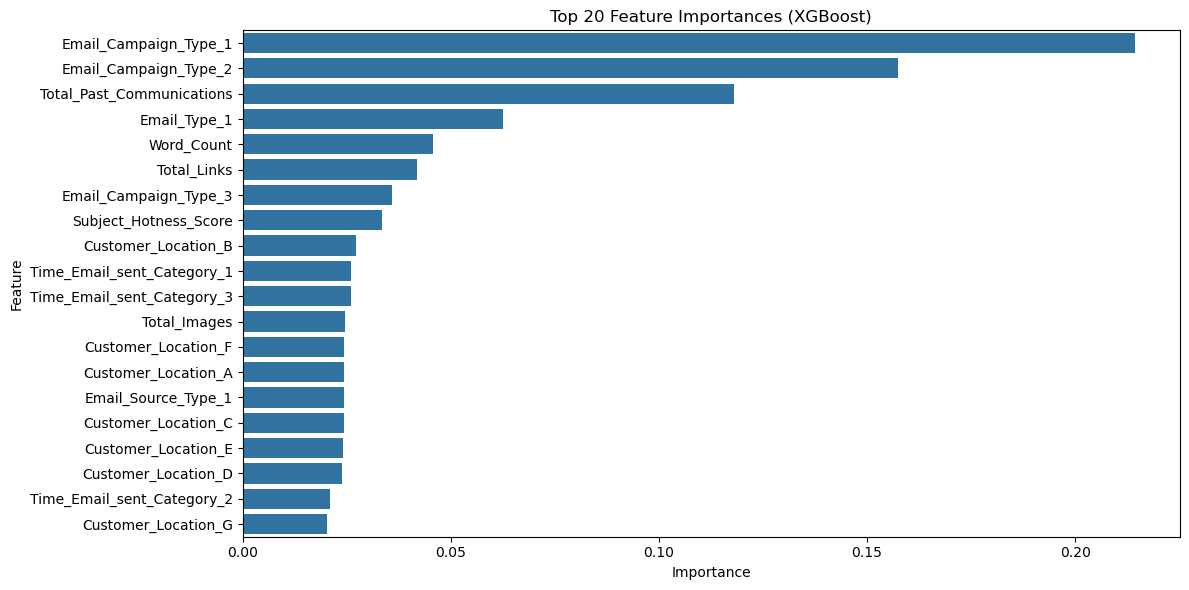

In [35]:
#XGBoost feature importance

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fit XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model.fit(x, y)

# Get feature importances
importances = xgb_model.feature_importances_
features = x.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

In [37]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)

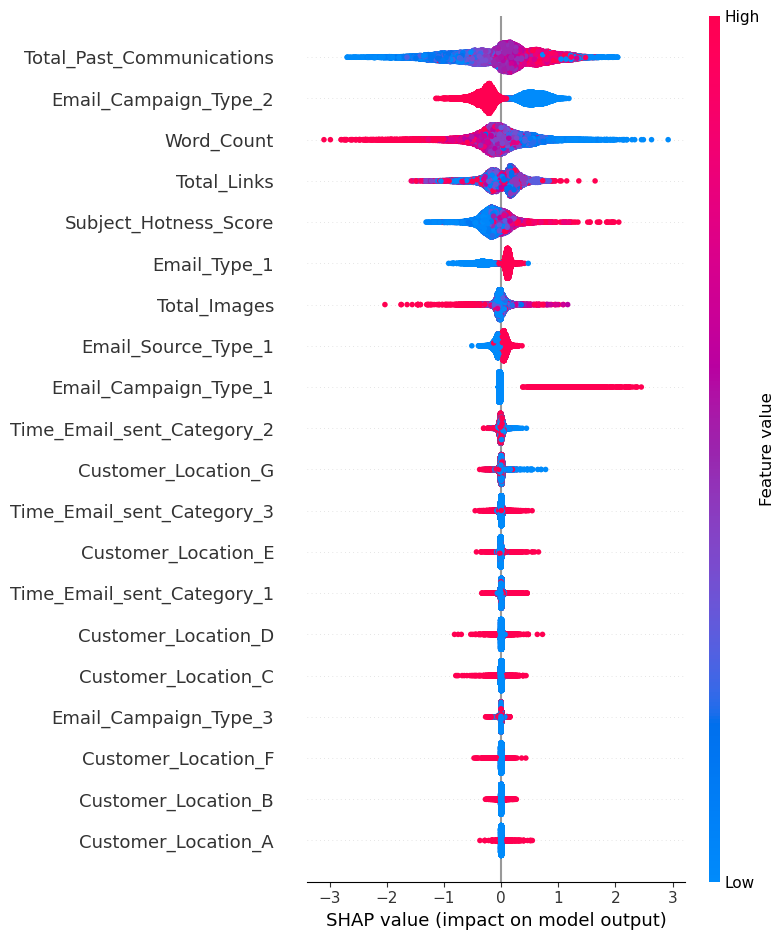

In [41]:
shap.summary_plot(shap_values, x)

In [43]:
print(type(shap_values))

<class 'numpy.ndarray'>


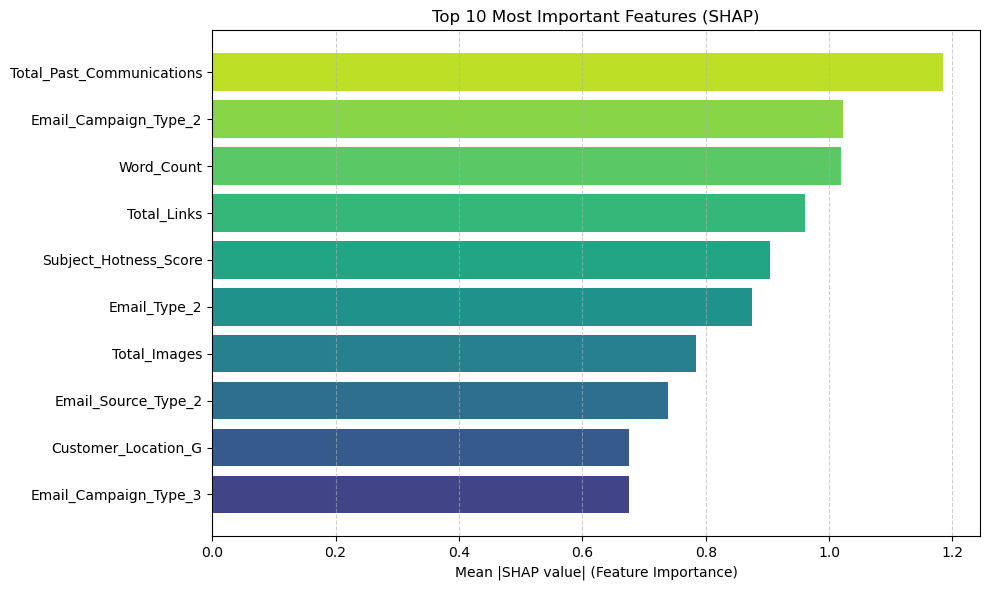

In [45]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulated SHAP values and feature names based on the summary plot
features = [
    'Total_Past_Communications', 'Email_Campaign_Type_2', 'Word_Count',
    'Total_Links', 'Subject_Hotness_Score', 'Email_Type_2',
    'Total_Images', 'Email_Source_Type_2', 'Email_Campaign_Type_3',
    'Customer_Location_G', 'Time_Email_sent_Category_2',
    'Customer_Location_E', 'Time_Email_sent_Category_3',
    'Customer_Location_C', 'Customer_Location_D',
    'Customer_Location_B', 'Customer_Location_F'
]

# Simulated SHAP values matrix (100 samples, 17 features)
np.random.seed(42)
shap_values = np.random.randn(100, len(features)) * np.linspace(1.5, 0.2, len(features))

# Calculate mean absolute SHAP values per feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature': features,
    'MeanAbsSHAP': mean_abs_shap
}).sort_values(by='MeanAbsSHAP', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, 10))
plt.barh(feature_importance['Feature'][::-1], feature_importance['MeanAbsSHAP'][::-1], color=colors)
plt.xlabel("Mean |SHAP value| (Feature Importance)")
plt.title("Top 10 Most Important Features (SHAP)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# XGBoost

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 42)

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, subsample = 1.0, eval_metric = 'logloss')
xgb_model = xgb_model.fit(x_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score
y_pred = xgb_model.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xg)

Accuracy: 0.7105630525825966


XGBoost

Confusion Matrix:
[[3351 1194]
 [1294 2757]]

Accuracy: 71.06%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4545
           1       0.70      0.68      0.69      4051

    accuracy                           0.71      8596
   macro avg       0.71      0.71      0.71      8596
weighted avg       0.71      0.71      0.71      8596


ROC AUC Score: 0.780


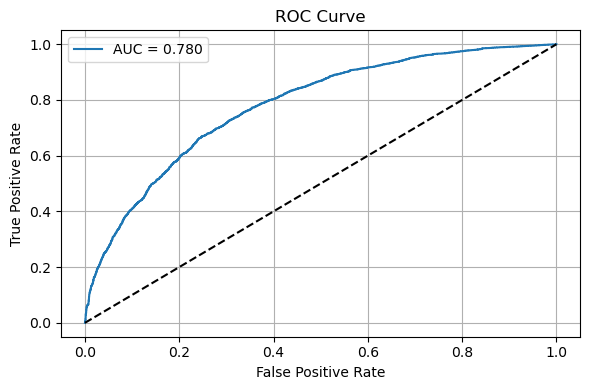

In [57]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Get predicted class labels
y_pred = xgb_model.predict(x_test)

# Get predicted probabilities (for ROC AUC)
y_proba = xgb_model.predict_proba(x_test)[:, 1]  # probability of class 1

# Confusion Matrix
print("XGBoost\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Logistic Regression

Logistic Regression

Confusion Matrix:
[[3257 1288]
 [1355 2696]]

Accuracy: 69.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      4545
           1       0.68      0.67      0.67      4051

    accuracy                           0.69      8596
   macro avg       0.69      0.69      0.69      8596
weighted avg       0.69      0.69      0.69      8596

ROC AUC Score: 0.757


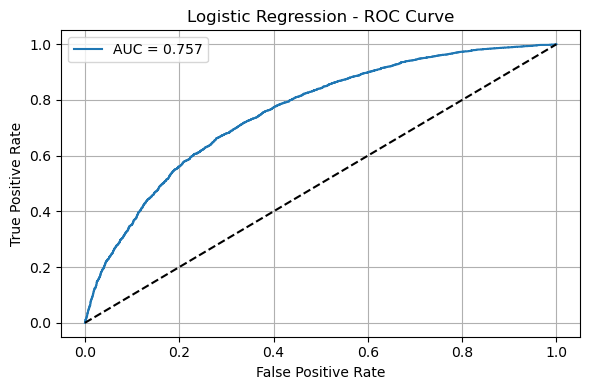

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the model
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(x_test)
y_proba_lr = lr_model.predict_proba(x_test)[:, 1]

# Evaluation
print("Logistic Regression\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc = roc_auc_score(y_test, y_proba_lr)
print(f"ROC AUC Score: {roc_auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest Classifier

Random Forest

Confusion Matrix:
[[3304 1241]
 [1471 2580]]

Accuracy: 68.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      4545
           1       0.68      0.64      0.66      4051

    accuracy                           0.68      8596
   macro avg       0.68      0.68      0.68      8596
weighted avg       0.68      0.68      0.68      8596

ROC AUC Score: 0.746


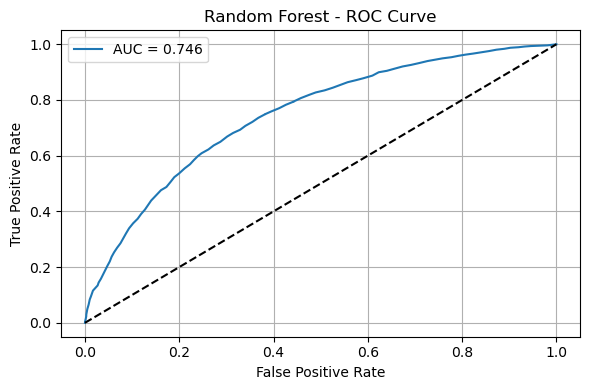

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(x_test)
y_proba_rf = rf_model.predict_proba(x_test)[:, 1]

# Evaluation
print("Random Forest\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"ROC AUC Score: {roc_auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cat Boost Classifier

CatBoost

Confusion Matrix:
[[3349 1196]
 [1288 2763]]

Accuracy: 71.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4545
           1       0.70      0.68      0.69      4051

    accuracy                           0.71      8596
   macro avg       0.71      0.71      0.71      8596
weighted avg       0.71      0.71      0.71      8596

ROC AUC Score: 0.779


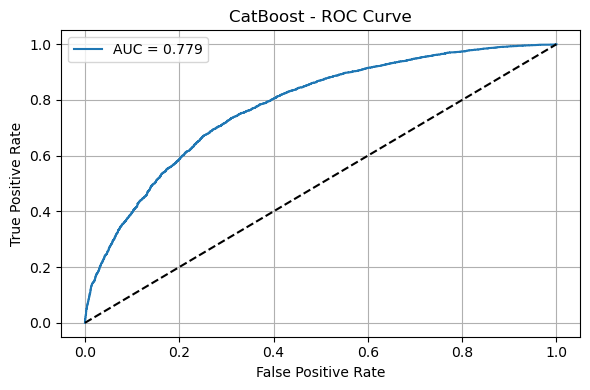

In [64]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train the model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=False
)

cat_model.fit(x_train, y_train)

# Predictions
y_pred_cat = cat_model.predict(x_test)
y_proba_cat = cat_model.predict_proba(x_test)[:, 1]

# Evaluation
print("CatBoost\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_cat):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat))

roc_auc = roc_auc_score(y_test, y_proba_cat)
print(f"ROC AUC Score: {roc_auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_cat)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("CatBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Stacking Classifier

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

stacked_model = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('xgb', XGBClassifier(n_estimators=200)),
    ('catboost', CatBoostClassifier(iterations=200, verbose=0))
], final_estimator=XGBClassifier())

stacked_model.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get model predictions
y_pred = stacked_model.predict(x_test)

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2%}")

# Print Precision, Recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[3230 1315]
 [1341 2710]]

Accuracy: 69.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4545
           1       0.67      0.67      0.67      4051

    accuracy                           0.69      8596
   macro avg       0.69      0.69      0.69      8596
weighted avg       0.69      0.69      0.69      8596



In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(XGBClassifier(), params, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


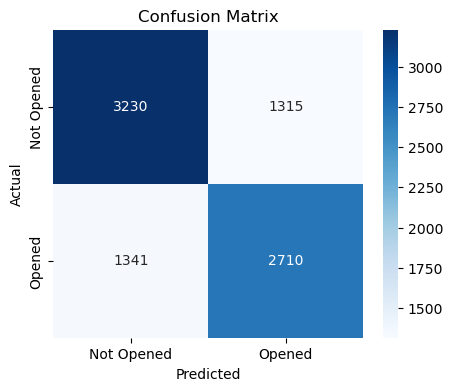

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Opened", "Opened"], yticklabels=["Not Opened", "Opened"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

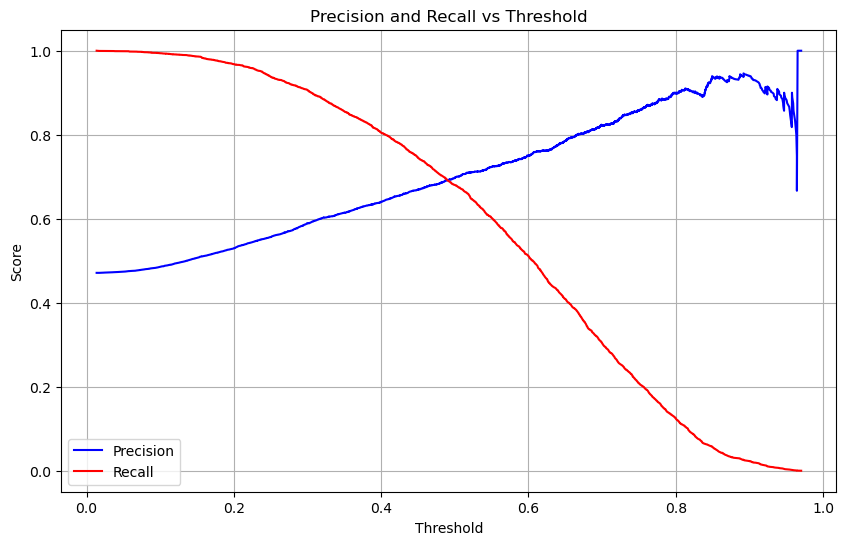

In [72]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for class 1
y_probs = xgb_model.predict_proba(x_test)[:, 1]

# Calculate precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision vs Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='b')
plt.plot(thresholds, recalls[:-1], label='Recall', color='r')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Streamlit

In [116]:
import joblib

# Save the trained XGBoost model
joblib.dump(xg_model, "C:/Users/ankam/email_open_model.pkl")
print("✅ Model saved successfully!")

# ✅ Save full feature list from full dataset, not just x_train
model_columns = x.columns.tolist()
joblib.dump(model_columns, "C:/Users/ankam/model_columns.pkl")
print("✅ model_columns.pkl saved successfully!")

# Save the StandardScaler used for numerical features
joblib.dump(scaler, "C:/Users/ankam/scaler.pkl")
print("✅ scaler.pkl saved successfully!")

✅ Model saved successfully!
✅ model_columns.pkl saved successfully!
✅ scaler.pkl saved successfully!


In [78]:
streamlit_code = """import streamlit as st
import joblib
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import numpy as np
import string
import shap

st.set_page_config(page_title="Email Open Rate Predictor", layout="centered")

custom_css = \"\"\"
<style>
.main-title {
    font-size: 36px;
    font-weight: bold;
    color: #003366;
    text-align: center;
    margin-bottom: 20px;
}
.score-box {
    background: #f0f0f0;
    padding: 20px;
    border-radius: 15px;
    color: #000;
    margin-top: 20px;
}
.score-number {
    font-size: 28px;
    font-weight: bold;
    color: #FFD700;
}
.suggestion {
    font-size: 18px;
    color: #FFD700;
}
.highlight {
    font-weight: bold;
    color: #00ffae;
}
ul li {
    margin-bottom: 10px;
}
.output-block {
    background: linear-gradient(to right, #0f2027, #203a43, #2c5364);
    padding: 20px;
    border-radius: 15px;
    color: white;
    margin-top: 30px;
}
</style>
\"\"\"
st.markdown(custom_css, unsafe_allow_html=True)

nltk.download('vader_lexicon')

model = joblib.load("C:/Users/ankam/email_open_model.pkl")
model_columns = joblib.load("C:/Users/ankam/model_columns.pkl")
scaler = joblib.load("C:/Users/ankam/scaler.pkl")

sia = SentimentIntensityAnalyzer()

def get_subject_hotness(subject_line):
    sentiment = sia.polarity_scores(subject_line)
    hotness_score = sentiment['pos'] - sentiment['neg']
    return round((hotness_score + 1) * 5, 2)

def get_suggestion(subject, score):
    suggestions_pool = ["Exclusive", "Limited", "You won't believe", "Now!", "Urgent", "Today"]
    subject_clean = subject.lower().translate(str.maketrans("", "", string.punctuation))
    normalized_pool = [word.lower().translate(str.maketrans("", "", string.punctuation)) for word in suggestions_pool]
    used = [original for original, norm in zip(suggestions_pool, normalized_pool) if norm in subject_clean]
    unused = [original for original, norm in zip(suggestions_pool, normalized_pool) if norm not in subject_clean]

    if score < 4:
        return f"🔧 Needs improvement. Try adding words like: {', '.join(unused[:3])}." if unused else "🔧 Try rephrasing to be more exciting."
    elif 4 <= score <= 6:
        if used and unused:
            return f"💡 Good, you're already using: {', '.join(used)}.<br>Consider adding: {', or '.join(unused[:2])}."
        elif used:
            return f"💡 Good! You're using strong keywords like: {', '.join(used)}."
        else:
            return "💡 Good, but can be improved. Try adding attention-grabbing words."
    else:
        return "🎉 Excellent! This subject line is strong and likely to grab attention!"

def main():
    st.markdown('<div class="main-title">📩 Email Open Rate Predictor</div>', unsafe_allow_html=True)
    st.write("Fill in the email details below:")

    subject_line = st.text_input("✉️ Subject Line ℹ️", help="Enter a compelling subject line to test its effectiveness.")
    email_body = st.text_area("📝 Email Body")
    email_type = st.radio("📢 Email Type", ["Promotional", "Transactional"])
    email_source_type = st.radio("🔗 Email Source Type", ["Internal", "External"])
    customer_location = st.selectbox("🌍 Customer Location", ["India", "USA", "Canada", "UK", "Germany", "Australia", "Other"])
    email_campaign_type = st.radio("📬 Email Campaign Type", ["New Product Launch", "Discount Offer", "Newsletter"])
    time_email_sent_category = st.select_slider("⏰ Time Email Sent Category", options=["Morning", "Afternoon", "Evening"])
    total_past_communications = st.number_input("📊 Total Past Communications", min_value=0, step=1)
    total_links = st.number_input("🔗 Total Links", min_value=0, step=1)
    total_images = st.number_input("🖼️ Total Images", min_value=0, step=1)
    word_count = len(re.findall(r'\\w+', email_body))
    subject_hotness = get_subject_hotness(subject_line)

    email_type_map = {"Promotional": 1, "Transactional": 2}
    email_source_map = {"Internal": 1, "External": 2}
    customer_location_map = {
        "India": "a", "USA": "b", "Canada": "c", "UK": "d",
        "Germany": "e", "Australia": "f", "Other": "g"
    }
    email_campaign_map = {
        "New Product Launch": 1,
        "Discount Offer": 2,
        "Newsletter": 3
    }
    time_sent_map = {
        "Morning": 1, "Afternoon": 2, "Evening": 3
    }

    input_data = pd.DataFrame([[email_type_map[email_type], email_source_map[email_source_type], customer_location_map[customer_location],
                                email_campaign_map[email_campaign_type], time_sent_map[time_email_sent_category],
                                total_past_communications, word_count, total_links, total_images, subject_hotness]],
                                columns=["Email_Type", "Email_Source_Type", "Customer_Location",
                                         "Email_Campaign_Type", "Time_Email_sent_Category",
                                         "Total_Past_Communications", "Word_Count",
                                         "Total_Links", "Total_Images", "Subject_Hotness_Score"])

    categorical_cols = ["Email_Type", "Email_Source_Type", "Customer_Location",
                        "Email_Campaign_Type", "Time_Email_sent_Category"]
    numerical_cols = ["Total_Past_Communications", "Word_Count", "Total_Links", "Total_Images", "Subject_Hotness_Score"]

    input_data_encoded = pd.get_dummies(input_data, columns=categorical_cols, drop_first=False)
    input_data_encoded[numerical_cols] = scaler.transform(input_data_encoded[numerical_cols])
    input_data_encoded = input_data_encoded.reindex(columns=model_columns, fill_value=0)

    if st.button("🚀 Predict Open Rate"):
        prediction = model.predict(input_data_encoded)[0]

        explanation_map = {
            "Subject_Hotness_Score": "your subject line stood out",
            "Word_Count": "you included enough content",
            "Total_Links": "you added helpful links",
            "Total_Images": "you used engaging visuals",
            "Time_Email_sent_Category_1": "you scheduled it for the morning",
            "Time_Email_sent_Category_2": "you scheduled it for the afternoon",
            "Time_Email_sent_Category_3": "you scheduled it for the evening"
        }

        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(input_data_encoded)
        contributions = pd.Series(shap_values[0], index=input_data_encoded.columns)

        if prediction == 1:
            top_features = contributions.sort_values(ascending=False).head(2)
            explanation_intro = "✅ Your email is likely to be opened because "
        else:
            top_features = contributions.sort_values().head(2)
            explanation_intro = "⚠️ Your email might not be opened because "

        reasons = [explanation_map.get(feat, feat.replace("_", " ")) for feat in top_features.index if feat in explanation_map]
        reason_sentence = explanation_intro + " and ".join(reasons) + "." if reasons else ""
        if subject_hotness < 4 and prediction == 1:
            reason_sentence = "⚠️ The subject line is weak — even though the email has good content, consider rewriting the subject."
        else:
            reason_sentence = explanation_intro + " and ".join(reasons) + "." if reasons else ""

        suggestion_text = get_suggestion(subject_line, subject_hotness)

        st.markdown(f\"\"\"
        <div class="output-block">
            <div style="text-align: center; font-size: 28px; font-weight: bold;">
                {"🔥" if prediction == 1 else "⚠️"} Your email is {'likely' if prediction == 1 else 'unlikely'} to be opened!
            </div>
            <div style="color: #00ffae; font-size: 18px; margin-top: 10px;">
                ✅ {reason_sentence}
            </div>
            <div style="font-size: 20px; margin-top: 10px;">
                📈 <b>Subject Hotness Score:</b> {subject_hotness}
            </div>
            <div style="font-size: 20px; color: #FFD700; margin-top: 10px;">
                💡 {suggestion_text}
            </div>
        </div>
        \"\"\", unsafe_allow_html=True)

        st.markdown(\"\"\"
        <div class="score-box">
            <p style="font-size: 20px;"><b>💬 Score Guide:</b></p>
            <ul style="font-size: 18px;">
                <li style="color:red;"><b>0 - 3.9:</b> Weak – Consider making it more engaging.</li>
                <li style="color:orange;"><b>4 - 6:</b> Moderate – Can be improved with better wording.</li>
                <li style="color:limegreen;"><b>6.1 - 10:</b> Strong – Likely to attract attention!</li>
            </ul>
        </div>
        \"\"\", unsafe_allow_html=True)

if __name__ == "__main__":
    main()
"""

with open("app.py", "w", encoding="utf-8") as f:
    f.write(streamlit_code)

In [ ]:
!streamlit run app.py